# What paths slide the most? Which ones hit the rail and/or highway?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

avyobs= pd.read_pickle('../data-prep/pkl/avy_obs.pkl')

In [2]:
pd.set_option('display.max_columns', None)
avyobs

,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip
avrid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,SHED10,2012-03-26,12:45:00,stein_01,WS,5.0,NL,R1,D1.5,O,B,R,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Wet slab released on SE aspect @ 5400 feet (16...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
2,PATH1163,2012-03-16,08:30:00,stein_01,U,5.0,NU,U,D2,U,U,U,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Wet debris ran 2/3 path in main path to 4700 f...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
3,CURLY,2012-03-16,08:34:00,stein_01,U,5.0,NU,U,D1,U,U,U,0,0,NaN,0,0,0,0,0,0,TR,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Terminus at canyon floor elevation.\r\n\r\nDeb...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
4,SHED10,2012-03-10,14:50:00,stein_01,WL,5.0,NaN,R2,D1,I,M,R,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,D1.5,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
5,INFINITY,2012-03-10,14:54:00,stein_01,L,5.0,N,R2,D1,I,T,C,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,D1.5- 1/2 Path.,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,SHED07W,2022-03-01,05:04:00,clark_01,SS,5.0,NC,R2,D2,I,T,L,38,2015,E,1760,255,0,0,0,0,TK,-,U,U,False,0.0,0.0,False,0.0,0.0,Slab not observed until March 17th during a sk...,Adam,2022-03-17 21:17:04,10.30.72.4,NaN,0000-00-00 00:00:00,NaN
505,AP1163H,2022-03-23,13:30:00,clark_01,WL,5.0,NU,R1,D1.5,O,T,U,0,1830,SW,1460,370,0,0,0,0,TR,-,U,W,False,0.0,0.0,False,0.0,0.0,NaN,Adam,2022-03-23 21:32:42,10.30.72.4,NaN,0000-00-00 00:00:00,NaN
506,SHED10,2022-03-23,13:30:00,clark_01,WL,5.0,N,R2,D2,O,T,C,40,2075,SE,1646,429,0,0,0,0,TK,-,U,W,False,0.0,0.0,False,0.0,0.0,Obs on Mar. 24th from Hwy,Adam,2022-03-28 16:30:35,10.30.72.4,NaN,0000-00-00 00:00:00,NaN


In [3]:
paths = avyobs.avpathid.value_counts()
paths

PATH1163      105
INFINITY       58
SHED10         35
SHED07W        28
SHED11         23
JAKES          20
SHED07E        17
SHED08         16
JAVA           15
AP1163H        14
GRIZZLY        13
BURNOUT        10
UMBRELLA       10
LARRY          10
SHED09L         8
CURLY           8
SHED107         7
SHED05          7
SHED09          6
GOATLICK        6
JAVAGA          5
IBEAM           5
TestSlope2      5
MCAMSER         5
SECOND          5
SHED07          4
MSHLDS          4
CB1160          4
TestSlope3      4
SHED06          4
SHED04D         3
BROKEN          3
CB1164          3
AP1183          2
CB1159          2
FRYPAN          2
SHED12          2
TestSlope1      2
ELKFENCE        2
NOSHED          1
MO              1
CB1160-3        1
1155CUTBAN      1
ELKMTN          1
ESSEXMTN        1
HANGINGNO       1
MCAMNF          1
SHED07WP        1
Name: avpathid, dtype: int64

In [4]:
pathtop = paths.head(5)
pathtop

PATH1163    105
INFINITY     58
SHED10       35
SHED07W      28
SHED11       23
Name: avpathid, dtype: int64

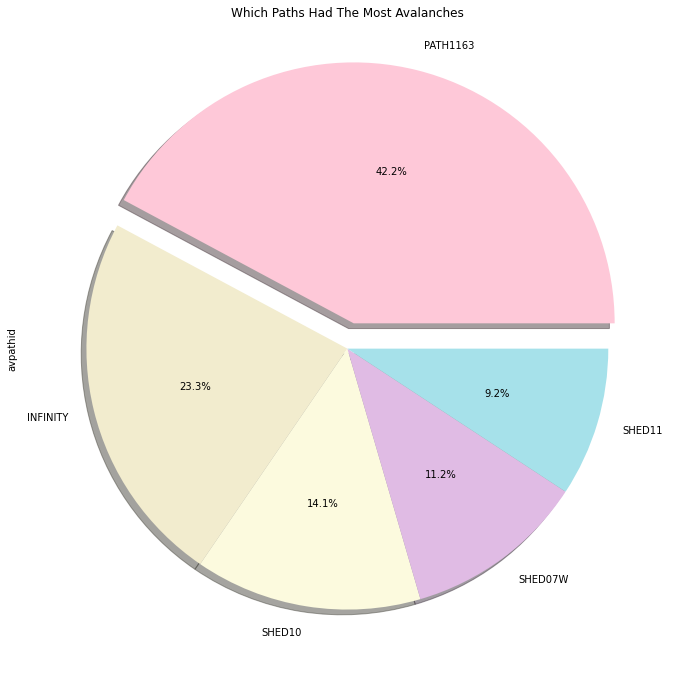

In [5]:
colors = ['#FEC8D8','#F2ECCE','#FCFADE','#E0BBE4','#A6E1EA']
explode = (0.1 ,0, 0, 0, 0)
avalanch = pathtop.plot.pie(title = "Which Paths Had The Most Avalanches", y='pathtop', figsize=(12, 12),autopct='%1.1f%%', colors = colors, explode = explode, shadow = True)



<AxesSubplot:xlabel='avpathid', ylabel='count'>

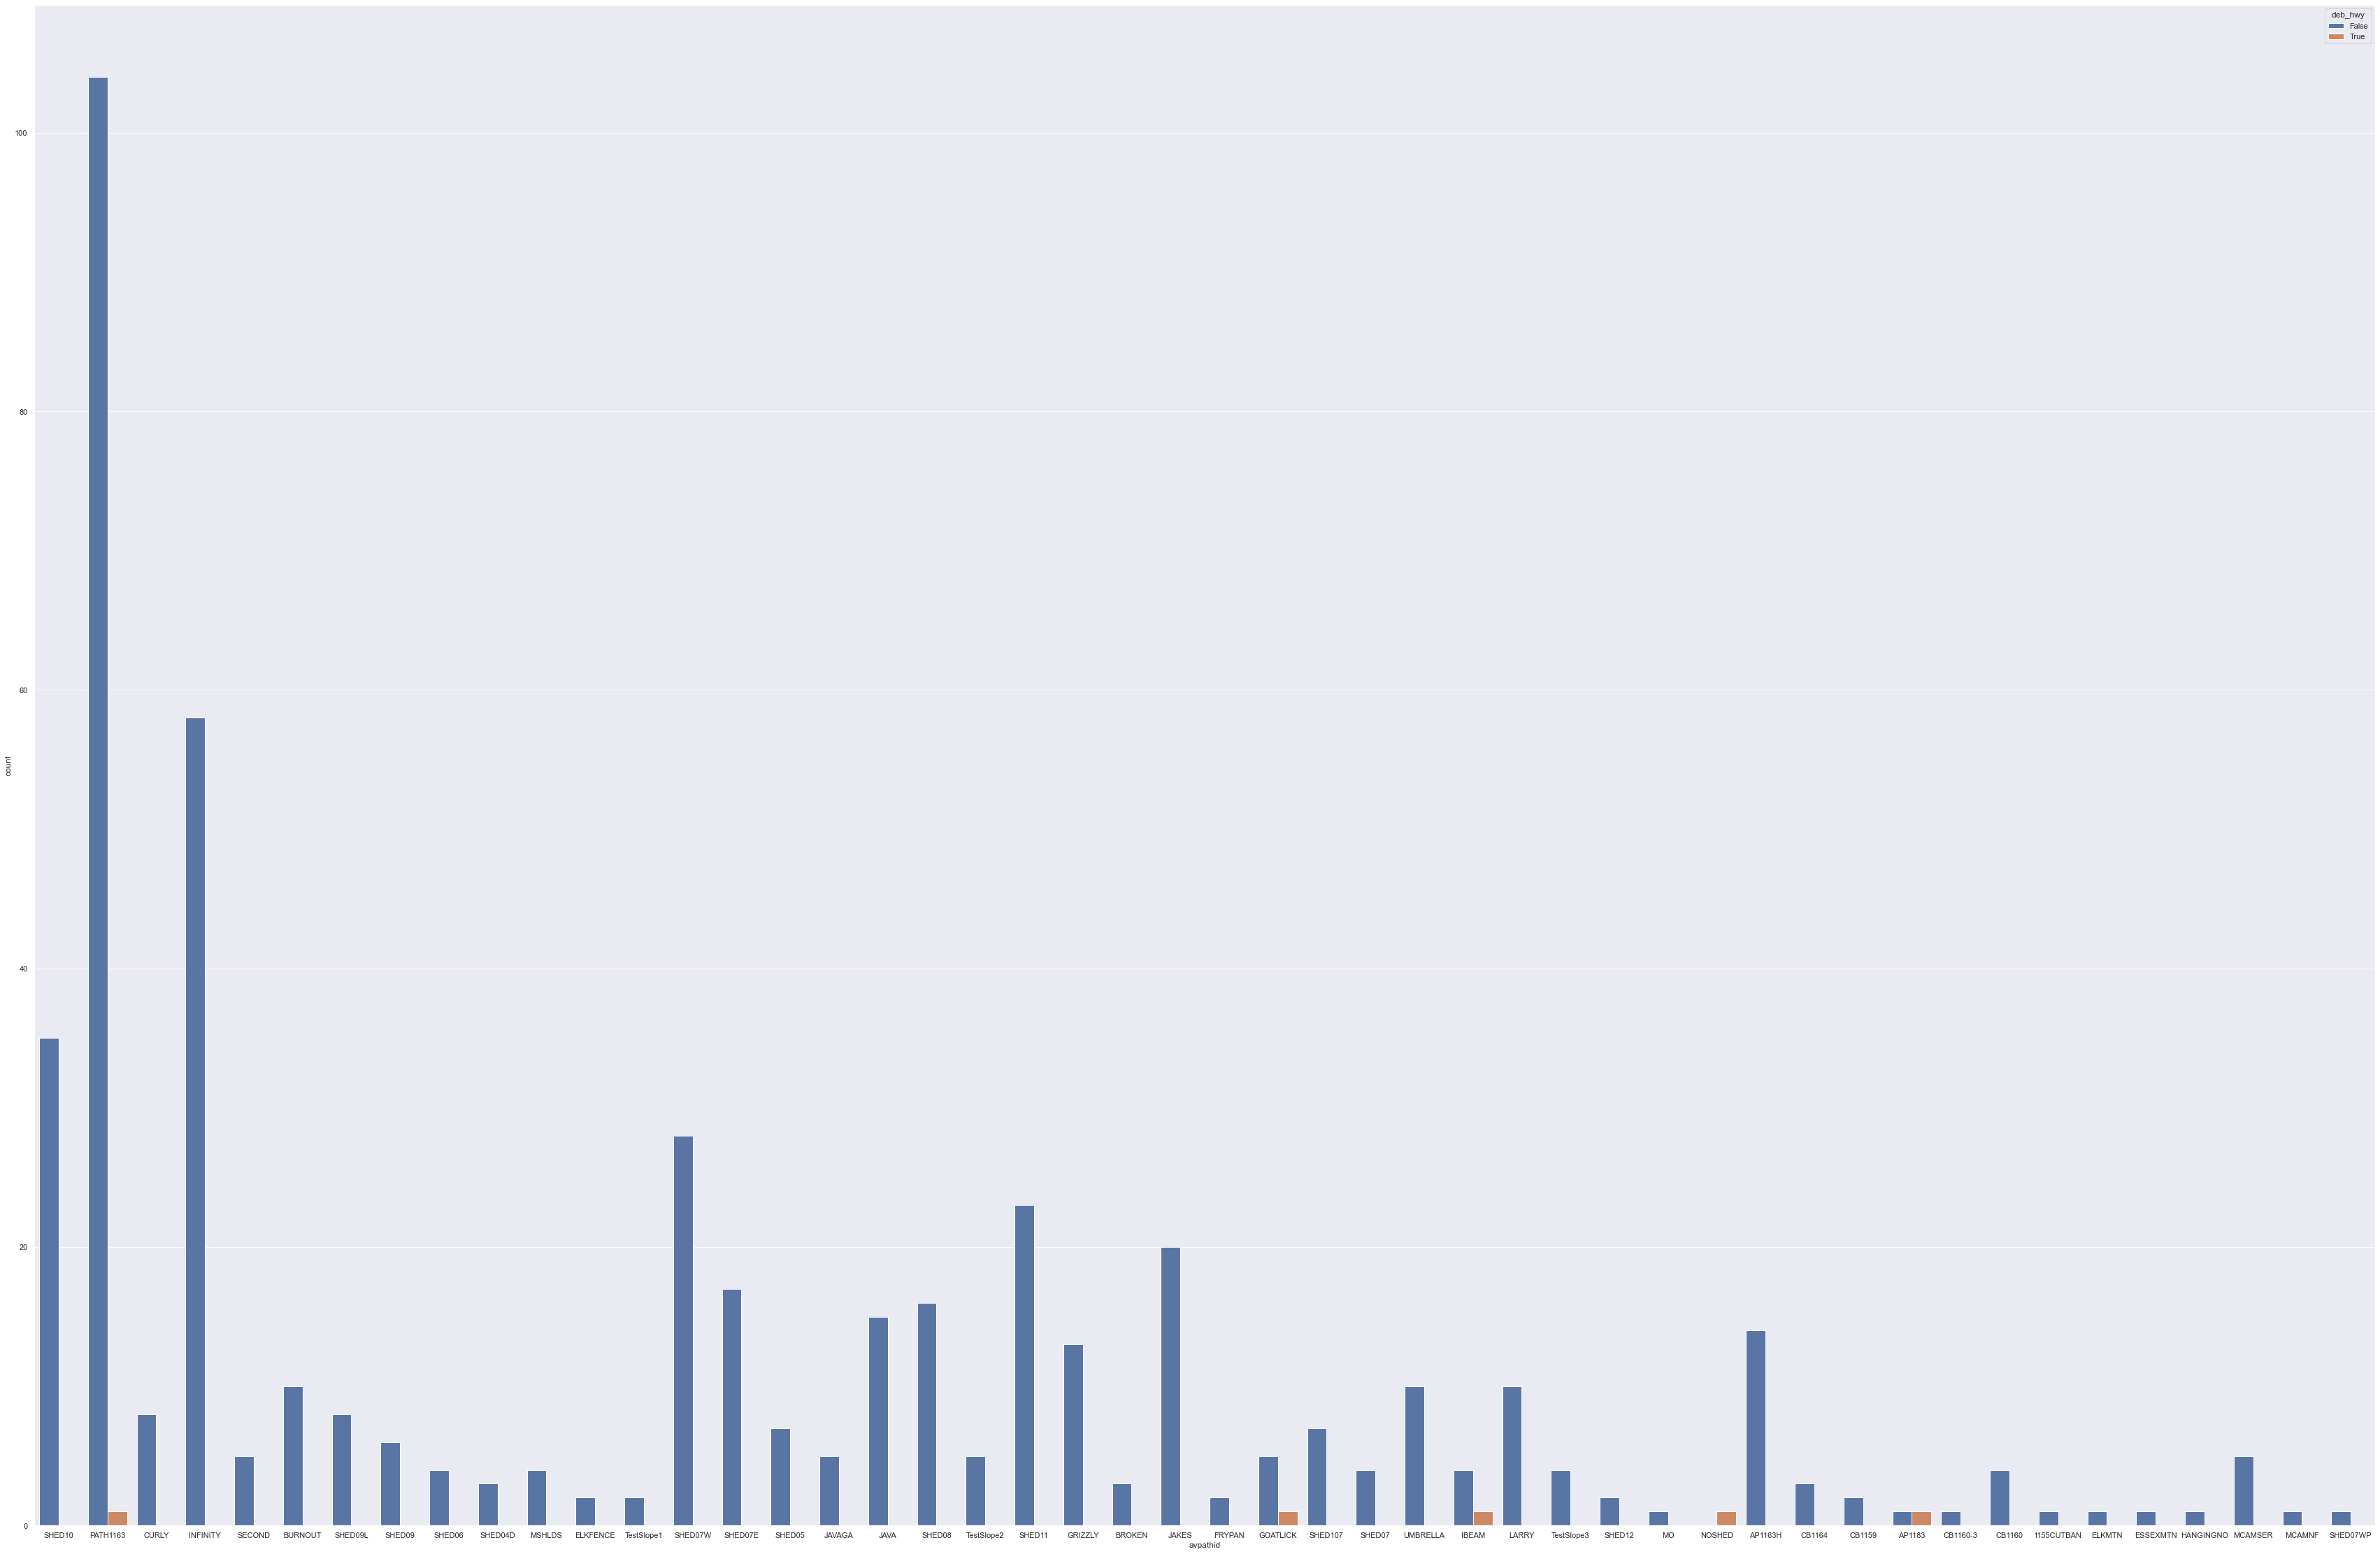

In [6]:
sns.set(rc={'figure.figsize':(60,40)})
sns.countplot(x = 'avpathid',
            hue = 'deb_hwy',
            data = avyobs)


In [7]:
avyobs.loc[avyobs.deb_hwy == True]

,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip
avrid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
232,IBEAM,2014-03-06,05:30:00,stein_01,SS,5.0,NU,R2,D3,O,T,R,40,2242,N,1230,1012,160,150,100,125,TK,-,U,W,False,0.0,0.0,True,20.0,20.0,SS-N-R2-D3-O.\nDebris terminated at Highway el...,Ted,2016-03-17 11:50:56,72.160.63.46,Ted,2020-06-29 12:25:56,64.91.61.64
234,GOATLICK,2014-03-06,07:00:00,stein_01,SS,5.0,N,R3,D4,O,T,C,35,2212,N,1152,1060,800,120,120,120,BR,-,U,W,False,0.0,0.0,True,30.0,20.0,SS-N-R3-D4-O. Aspect= 240.\nRan full path pass...,Ted,2016-03-17 11:50:56,72.160.63.46,Ted,2020-06-29 11:52:37,64.91.61.64
260,PATH1163,2017-02-09,08:30:00,stein_01,SS,5.0,N,R3,D3,I,M,L,40,2028,SE,1236,792,45,120,90,105,BR,-,U,D,True,100.0,1.5,True,20.0,0.1,Natural SS avalanche in Path 1163 triggered na...,Ted,2017-02-27 15:25:55,139.51.15.20,Ted,2020-06-29 13:13:18,64.91.61.64
263,NOSHED,2017-02-07,12:30:00,stein_01,SS,1.0,AX,R4,D2,G,T,C,38,1353,N,1235,118,30,90,60,75,U,BP,3F,D,True,30.0,1.0,True,10.0,0.2,Triggered with Daisy Bell. Avalanche terminate...,Ted,2017-02-27 15:54:02,139.51.15.22,Ted,2020-06-29 09:58:06,64.91.61.64
291,AP1183,2017-02-07,03:30:00,stein_01,SS,5.0,N,R3,D3,O,T,C,39,1697,N,1030,667,364,120,300,210,BR,-,-,D,True,120.0,2.0,True,30.0,0.1,1183 avalanche ran at approximately 2230 on 2/...,Ted,2017-12-28 13:19:38,139.51.15.19,Ted,2020-06-29 10:33:44,64.91.61.64


<AxesSubplot:xlabel='avpathid', ylabel='count'>

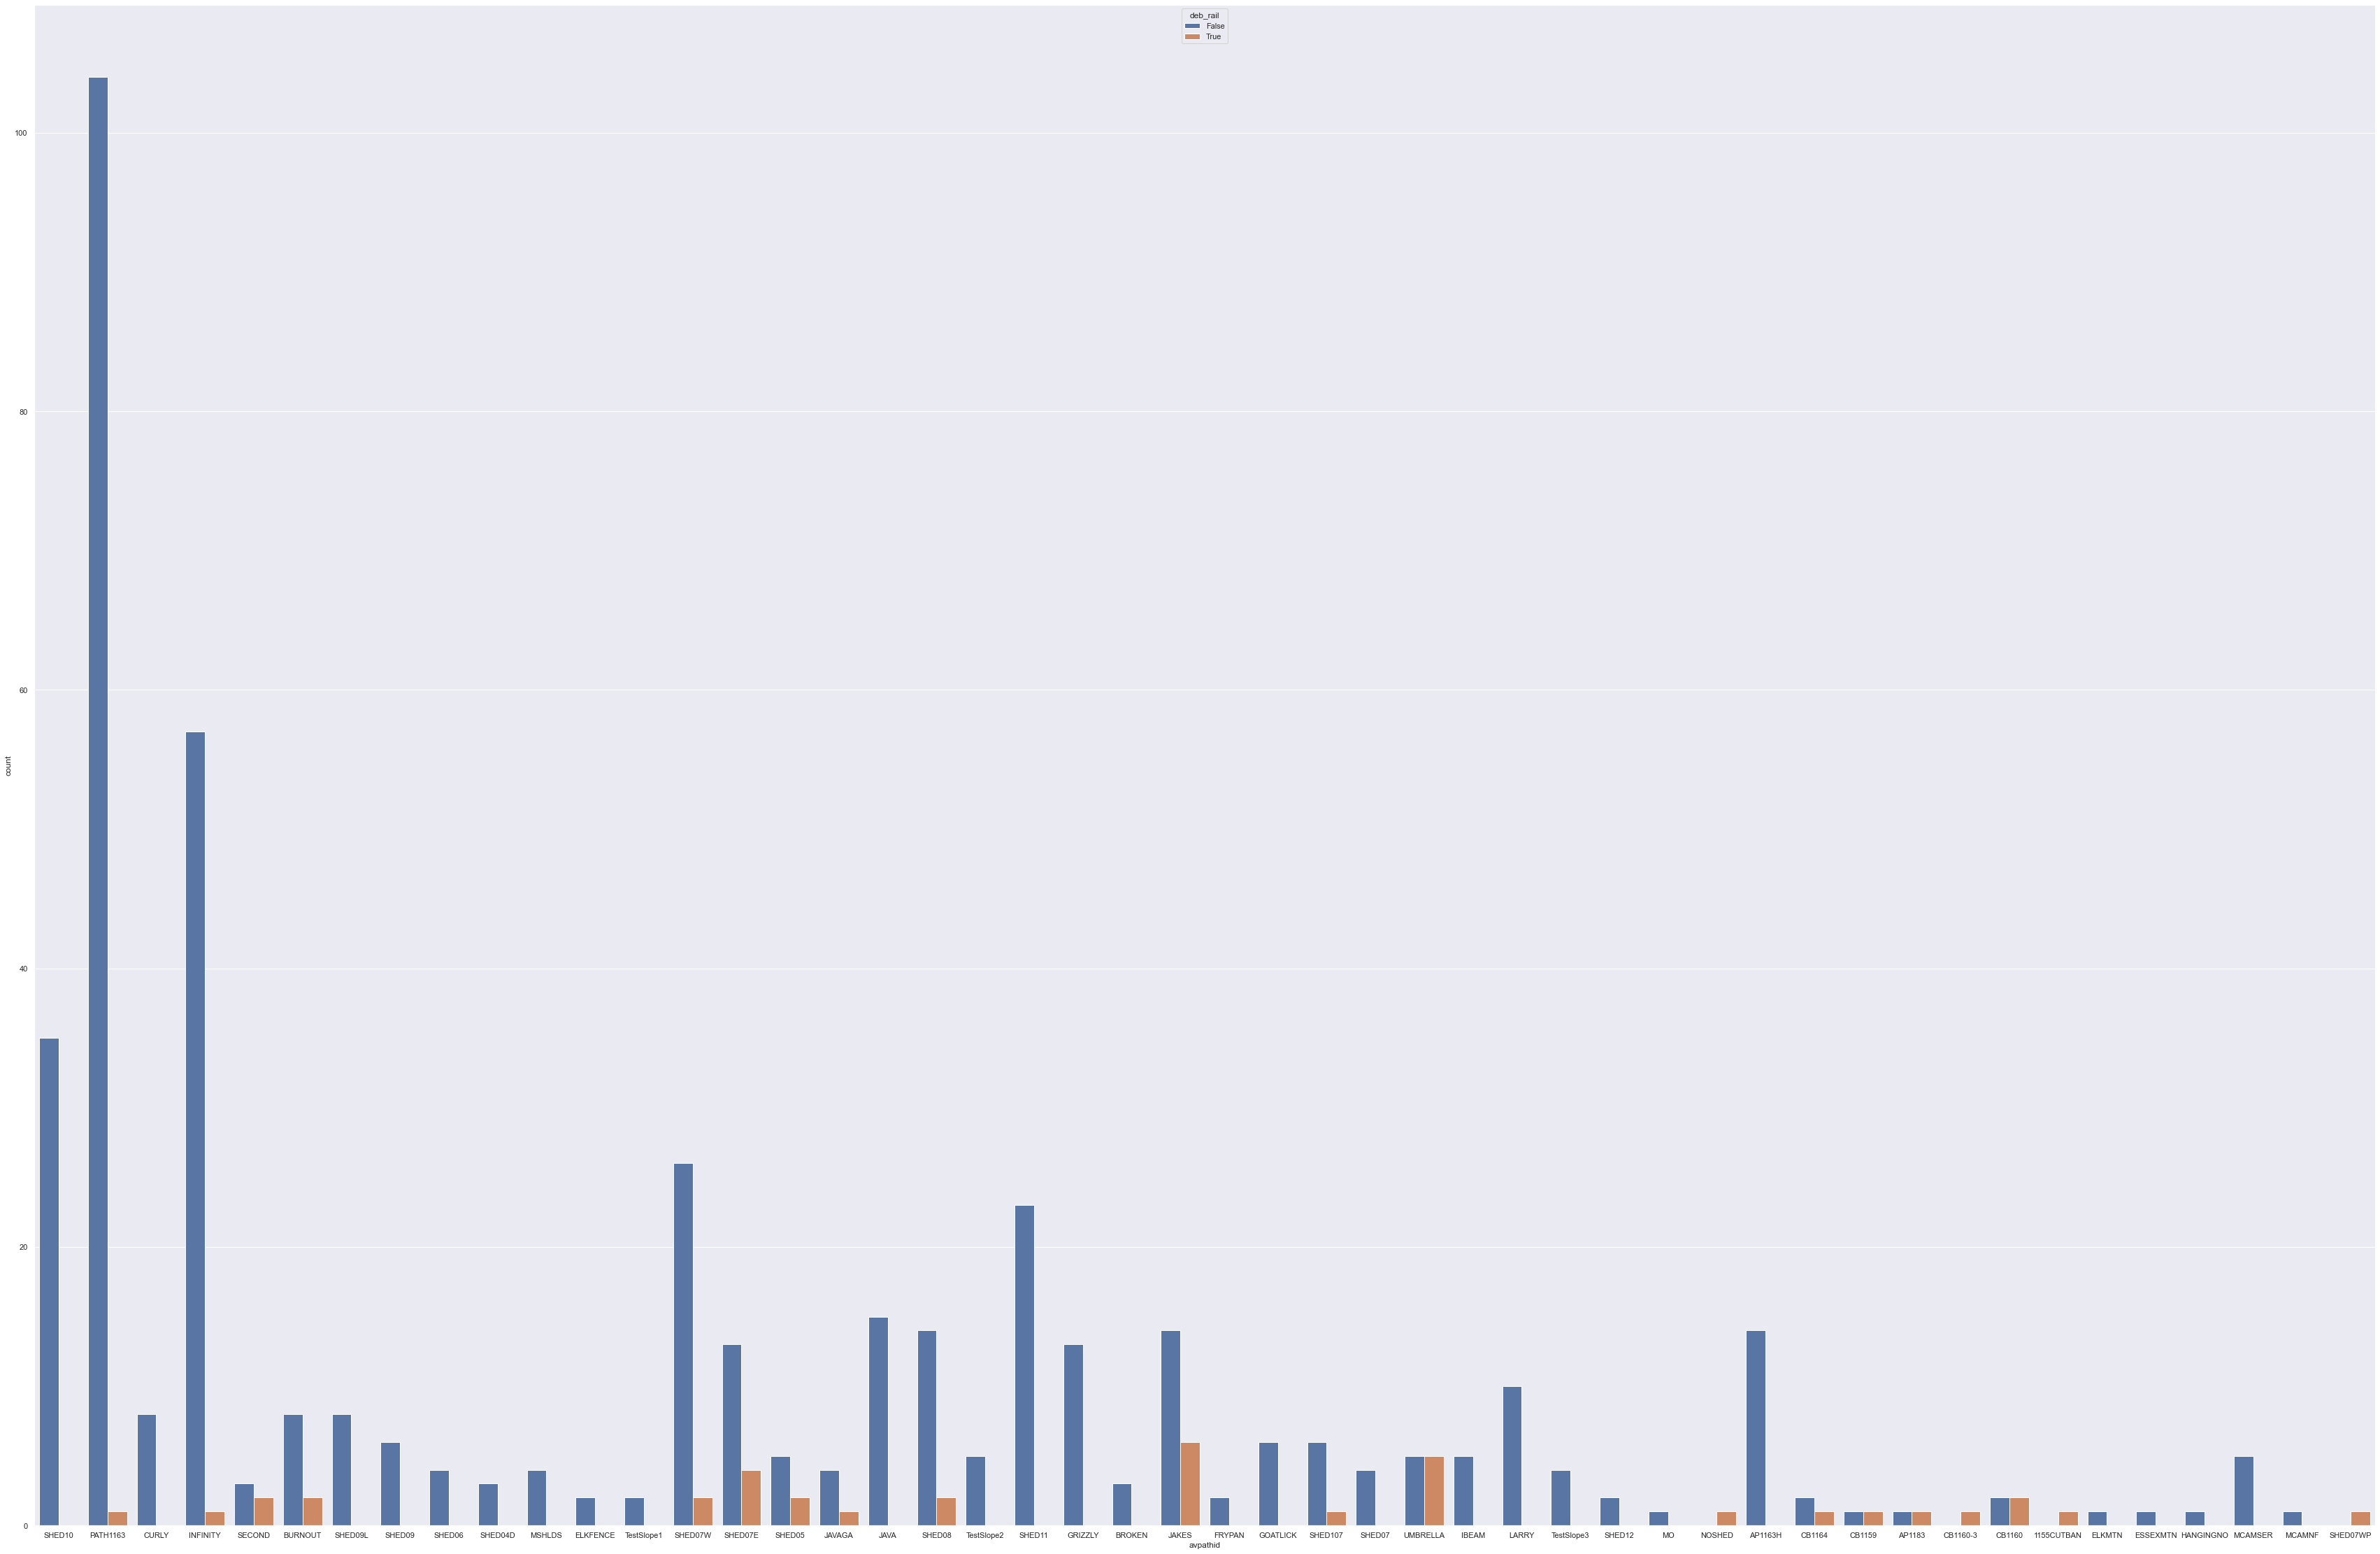

In [8]:
sns.set(rc={'figure.figsize':(60,40)})
sns.countplot(x = 'avpathid',
            hue = 'deb_rail',
            data = avyobs)

In [9]:
avyobs.loc[avyobs.deb_rail == True]

,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip
avrid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39,SHED05,2011-01-16,20:15:00,stein_01,HS,5.0,N,R4,D4,O,T,C,0,0,N,0,0,0,0,0,0,BR,-,U,U,True,30.0,0.2,False,0.0,0.0,HS-N-R4-D3.5-O. 85% SZ. This was a rain/snow...,Steiner,2016-03-17 11:50:56,01,Ted,2020-06-29 11:14:49,64.91.61.64
73,SHED05,2009-01-08,13:59:00,stein_01,HS,5.0,N,U,D3,G,T,U,0,0,N,0,0,0,0,0,0,BR,-,U,U,True,30.0,8.0,False,0.0,0.0,backfilled snowshed 30' height 100' linear - a...,NaN,2016-03-17 11:50:56,NaN,Ted,2020-06-29 10:58:51,64.91.61.64
89,SHED08,2008-12-29,12:25:00,stein_01,SS,5.0,N,R3,D3,G,U,L,0,0,N,0,0,0,0,0,0,BR,-,U,U,True,0.0,0.0,False,0.0,0.0,"8 foot crown, path filled and debris over the ...",NaN,2016-03-17 11:50:56,NaN,Ted,2020-06-29 10:36:19,64.91.61.64
143,SHED08,2006-02-25,12:55:00,stein_01,SS,1.0,AE,R3,D3,U,M,C,0,1870,E,1333,537,60,180,90,135,BR,-,U,D,True,20.0,0.5,False,0.0,0.0,Explosives triggered avalanche. 2006-02-25 mi...,NaN,2016-03-17 11:50:56,NaN,Ted,2020-06-29 10:42:33,64.91.61.64
221,SHED07E,2014-03-09,17:06:00,stein_01,WS,5.0,NC,R2,D2.5,O,M,L,38,1818,N,1318,500,60,90,60,75,BR,-,2F,W,True,0.0,0.0,False,0.0,0.0,Released as a SS at rain line about half way d...,Ted,2016-03-17 11:50:56,10.173.132.4,Ted,2020-06-29 11:44:57,64.91.61.64
233,SHED07W,2014-03-06,00:05:00,stein_01,SS,5.0,N,R3,D3.5,O,T,R,35,1924,N,1327,597,360,120,120,120,MR,-,U,W,True,30.0,20.0,False,0.0,0.0,SS-N-R3-D3+-O. Avg. Aspect= 180\nTerminus con...,Ted,2016-03-17 11:50:56,72.160.63.46,Ted,2020-06-29 12:33:15,64.91.61.64
257,SHED107,2017-02-06,10:00:00,clark_01,SS,5.0,NU,R2,D3,U,U,U,0,1796,N,1257,539,0,0,0,0,MR,-,U,U,True,20.0,0.2,False,0.0,0.0,Terminated on Shed 10.7 roof,Ted,2017-02-27 13:45:27,139.51.15.22,Ted,2020-06-29 10:16:11,64.91.61.64
259,SHED07E,2017-02-06,10:15:00,clark_01,SS,5.0,NU,R3,D3,U,T,C,40,1882,N,1294,588,70,90,90,90,TR,-,U,D,True,30.0,1.5,False,0.0,0.0,Terminated in runout below Shed 7. Climbing l...,Ted,2017-02-27 14:18:50,139.51.15.22,Ted,2020-06-29 10:14:50,64.91.61.64
260,PATH1163,2017-02-09,08:30:00,stein_01,SS,5.0,N,R3,D3,I,M,L,40,2028,SE,1236,792,45,120,90,105,BR,-,U,D,True,100.0,1.5,True,20.0,0.1,Natural SS avalanche in Path 1163 triggered na...,Ted,2017-02-27 15:25:55,139.51.15.20,Ted,2020-06-29 13:13:18,64.91.61.64


In [10]:
both = avyobs.loc[(avyobs.deb_rail == True) | (avyobs.deb_hwy == True)]
both

,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip
avrid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39,SHED05,2011-01-16,20:15:00,stein_01,HS,5.0,N,R4,D4,O,T,C,0,0,N,0,0,0,0,0,0,BR,-,U,U,True,30.0,0.2,False,0.0,0.0,HS-N-R4-D3.5-O. 85% SZ. This was a rain/snow...,Steiner,2016-03-17 11:50:56,01,Ted,2020-06-29 11:14:49,64.91.61.64
73,SHED05,2009-01-08,13:59:00,stein_01,HS,5.0,N,U,D3,G,T,U,0,0,N,0,0,0,0,0,0,BR,-,U,U,True,30.0,8.0,False,0.0,0.0,backfilled snowshed 30' height 100' linear - a...,NaN,2016-03-17 11:50:56,NaN,Ted,2020-06-29 10:58:51,64.91.61.64
89,SHED08,2008-12-29,12:25:00,stein_01,SS,5.0,N,R3,D3,G,U,L,0,0,N,0,0,0,0,0,0,BR,-,U,U,True,0.0,0.0,False,0.0,0.0,"8 foot crown, path filled and debris over the ...",NaN,2016-03-17 11:50:56,NaN,Ted,2020-06-29 10:36:19,64.91.61.64
143,SHED08,2006-02-25,12:55:00,stein_01,SS,1.0,AE,R3,D3,U,M,C,0,1870,E,1333,537,60,180,90,135,BR,-,U,D,True,20.0,0.5,False,0.0,0.0,Explosives triggered avalanche. 2006-02-25 mi...,NaN,2016-03-17 11:50:56,NaN,Ted,2020-06-29 10:42:33,64.91.61.64
221,SHED07E,2014-03-09,17:06:00,stein_01,WS,5.0,NC,R2,D2.5,O,M,L,38,1818,N,1318,500,60,90,60,75,BR,-,2F,W,True,0.0,0.0,False,0.0,0.0,Released as a SS at rain line about half way d...,Ted,2016-03-17 11:50:56,10.173.132.4,Ted,2020-06-29 11:44:57,64.91.61.64
232,IBEAM,2014-03-06,05:30:00,stein_01,SS,5.0,NU,R2,D3,O,T,R,40,2242,N,1230,1012,160,150,100,125,TK,-,U,W,False,0.0,0.0,True,20.0,20.0,SS-N-R2-D3-O.\nDebris terminated at Highway el...,Ted,2016-03-17 11:50:56,72.160.63.46,Ted,2020-06-29 12:25:56,64.91.61.64
233,SHED07W,2014-03-06,00:05:00,stein_01,SS,5.0,N,R3,D3.5,O,T,R,35,1924,N,1327,597,360,120,120,120,MR,-,U,W,True,30.0,20.0,False,0.0,0.0,SS-N-R3-D3+-O. Avg. Aspect= 180\nTerminus con...,Ted,2016-03-17 11:50:56,72.160.63.46,Ted,2020-06-29 12:33:15,64.91.61.64
234,GOATLICK,2014-03-06,07:00:00,stein_01,SS,5.0,N,R3,D4,O,T,C,35,2212,N,1152,1060,800,120,120,120,BR,-,U,W,False,0.0,0.0,True,30.0,20.0,SS-N-R3-D4-O. Aspect= 240.\nRan full path pass...,Ted,2016-03-17 11:50:56,72.160.63.46,Ted,2020-06-29 11:52:37,64.91.61.64
257,SHED107,2017-02-06,10:00:00,clark_01,SS,5.0,NU,R2,D3,U,U,U,0,1796,N,1257,539,0,0,0,0,MR,-,U,U,True,20.0,0.2,False,0.0,0.0,Terminated on Shed 10.7 roof,Ted,2017-02-27 13:45:27,139.51.15.22,Ted,2020-06-29 10:16:11,64.91.61.64


In [12]:
hwy_rail = ['Rail', 'Rail', 'Rail', 'Rail','Rail', 'Hwy', 'Rail','Hwy','Rail','Rail','Both',"Rail",'Both',"Both",'Rail','Rail','Rail','Rail','Rail','Rail','Rail','Rail','Rail','Rail','Rail','Rail','Rail','Rail','Rail','Rail','Rail','Rail','Rail','Rail','Rail','Rail','Rail','Rail','Rail','Rail',]
both['hwy_rail'] = hwy_rail
both

/var/folders/_g/dr204lbj3s1c6m88fsk34kch0000gn/T/ipykernel_6362/2009341179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  both['hwy_rail'] = hwy_rail


,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip,hwy_rail
avrid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39,SHED05,2011-01-16,20:15:00,stein_01,HS,5.0,N,R4,D4,O,T,C,0,0,N,0,0,0,0,0,0,BR,-,U,U,True,30.0,0.2,False,0.0,0.0,HS-N-R4-D3.5-O. 85% SZ. This was a rain/snow...,Steiner,2016-03-17 11:50:56,01,Ted,2020-06-29 11:14:49,64.91.61.64,Rail
73,SHED05,2009-01-08,13:59:00,stein_01,HS,5.0,N,U,D3,G,T,U,0,0,N,0,0,0,0,0,0,BR,-,U,U,True,30.0,8.0,False,0.0,0.0,backfilled snowshed 30' height 100' linear - a...,NaN,2016-03-17 11:50:56,NaN,Ted,2020-06-29 10:58:51,64.91.61.64,Rail
89,SHED08,2008-12-29,12:25:00,stein_01,SS,5.0,N,R3,D3,G,U,L,0,0,N,0,0,0,0,0,0,BR,-,U,U,True,0.0,0.0,False,0.0,0.0,"8 foot crown, path filled and debris over the ...",NaN,2016-03-17 11:50:56,NaN,Ted,2020-06-29 10:36:19,64.91.61.64,Rail
143,SHED08,2006-02-25,12:55:00,stein_01,SS,1.0,AE,R3,D3,U,M,C,0,1870,E,1333,537,60,180,90,135,BR,-,U,D,True,20.0,0.5,False,0.0,0.0,Explosives triggered avalanche. 2006-02-25 mi...,NaN,2016-03-17 11:50:56,NaN,Ted,2020-06-29 10:42:33,64.91.61.64,Rail
221,SHED07E,2014-03-09,17:06:00,stein_01,WS,5.0,NC,R2,D2.5,O,M,L,38,1818,N,1318,500,60,90,60,75,BR,-,2F,W,True,0.0,0.0,False,0.0,0.0,Released as a SS at rain line about half way d...,Ted,2016-03-17 11:50:56,10.173.132.4,Ted,2020-06-29 11:44:57,64.91.61.64,Rail
232,IBEAM,2014-03-06,05:30:00,stein_01,SS,5.0,NU,R2,D3,O,T,R,40,2242,N,1230,1012,160,150,100,125,TK,-,U,W,False,0.0,0.0,True,20.0,20.0,SS-N-R2-D3-O.\nDebris terminated at Highway el...,Ted,2016-03-17 11:50:56,72.160.63.46,Ted,2020-06-29 12:25:56,64.91.61.64,Hwy
233,SHED07W,2014-03-06,00:05:00,stein_01,SS,5.0,N,R3,D3.5,O,T,R,35,1924,N,1327,597,360,120,120,120,MR,-,U,W,True,30.0,20.0,False,0.0,0.0,SS-N-R3-D3+-O. Avg. Aspect= 180\nTerminus con...,Ted,2016-03-17 11:50:56,72.160.63.46,Ted,2020-06-29 12:33:15,64.91.61.64,Rail
234,GOATLICK,2014-03-06,07:00:00,stein_01,SS,5.0,N,R3,D4,O,T,C,35,2212,N,1152,1060,800,120,120,120,BR,-,U,W,False,0.0,0.0,True,30.0,20.0,SS-N-R3-D4-O. Aspect= 240.\nRan full path pass...,Ted,2016-03-17 11:50:56,72.160.63.46,Ted,2020-06-29 11:52:37,64.91.61.64,Hwy
257,SHED107,2017-02-06,10:00:00,clark_01,SS,5.0,NU,R2,D3,U,U,U,0,1796,N,1257,539,0,0,0,0,MR,-,U,U,True,20.0,0.2,False,0.0,0.0,Terminated on Shed 10.7 roof,Ted,2017-02-27 13:45:27,139.51.15.22,Ted,2020-06-29 10:16:11,64.91.61.64,Rail


<AxesSubplot:xlabel='avpathid', ylabel='count'>

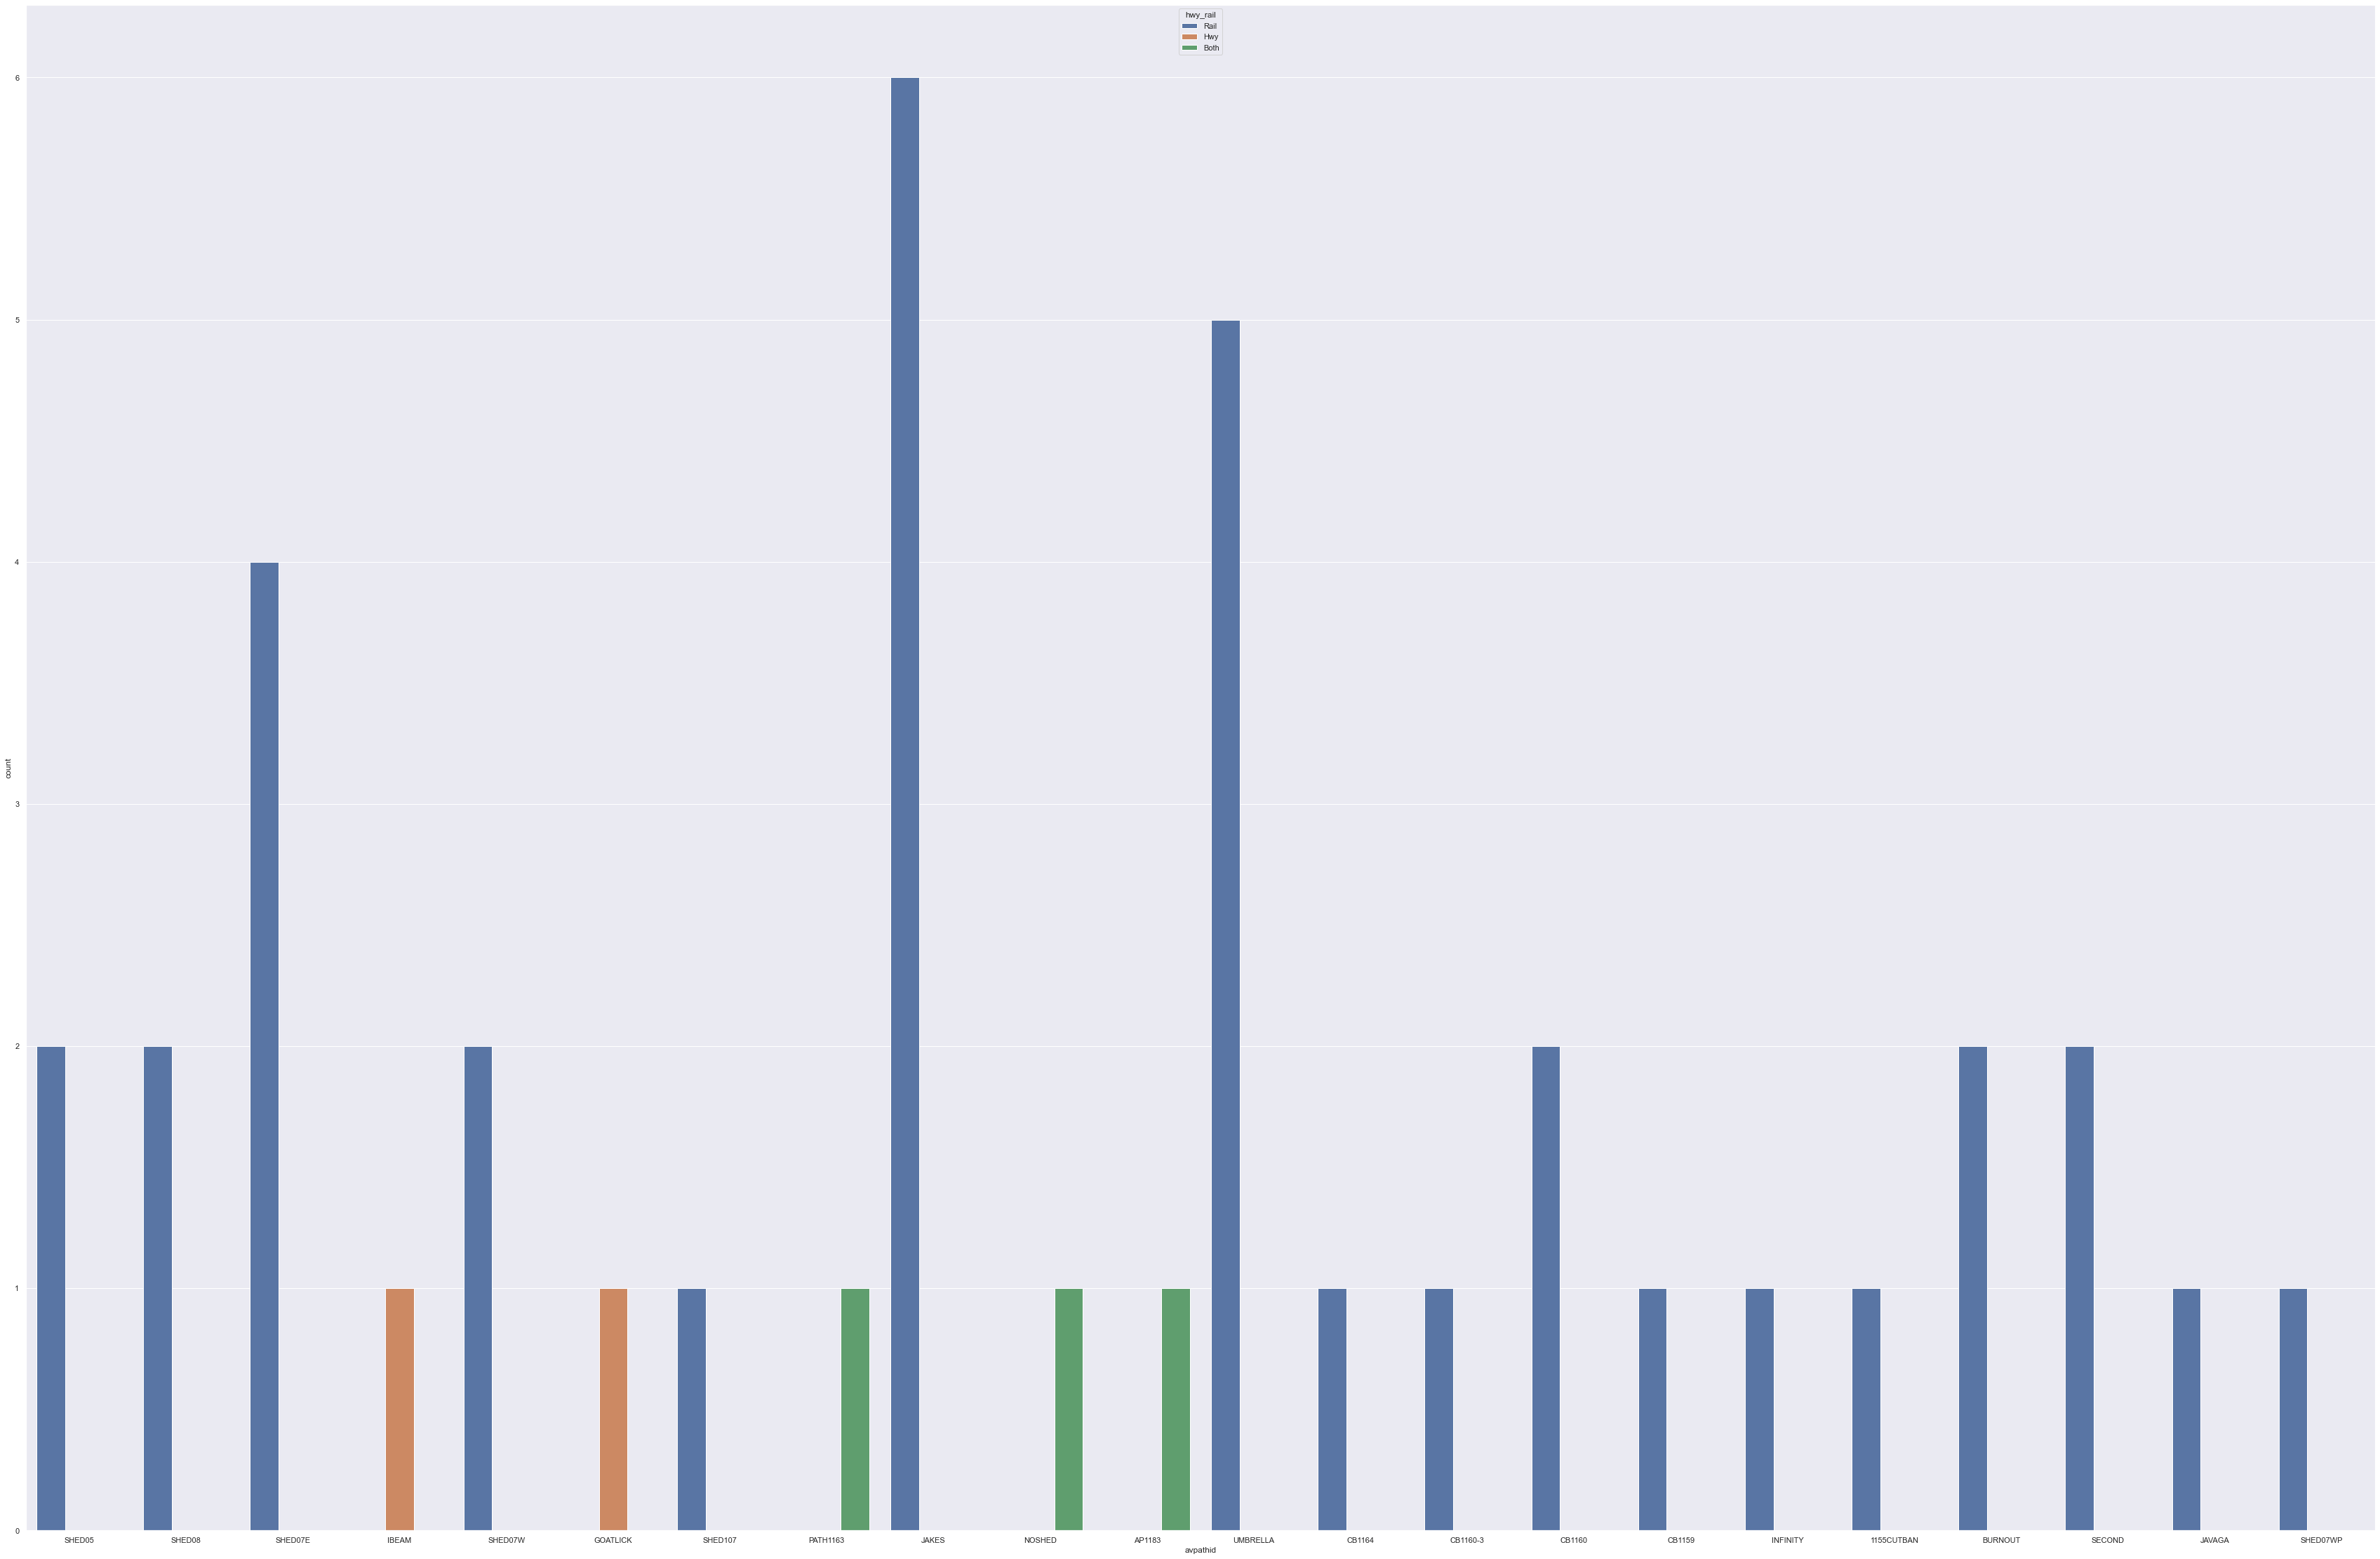

In [13]:
sns.set(rc={'figure.figsize':(60,40)})
sns.countplot(x = 'avpathid',
             hue = 'hwy_rail',
             data = both)

#### https://stackoverflow.com/questions/50319614/count-plot-with-stacked-bars-per-hue
